#v7: load saved data (cross-valid), data cleaning, y_noisy no obey rules

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
is_defined_T=0
N=0.0
if is_defined_T:
    noise_level_str=str(N)
else:
    noise_level_str='5002' #1001 mean 10.0% noise, random_state_split=1
is_colab=1
run_normal=1
run_LossCorrection=1
run_Rule=1
epochs_plot=30
epochs_rough=25
is_train_rough=1
random_state_split=1
data_augmentation = False
batch_size = 128
i_run_list=[0]



In [2]:
if is_colab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    work_path='/content/gdrive/MyDrive/Drive nguyendinhquoc312/LAB/Nakajo_labelNoise/code/manga109/'
else:
    work_path='/home/nakajolab1/code_labelnoise_tomo/cifar10/'

Mounted at /content/gdrive


#import

In [3]:
#10%: acc_well_model:871 rand_state=3 thread_noise= 0.435 <=> (871 3 435);  (871 2 435);(871 1 335)
#20%: (754 3 445);  (754 2 44);(754 1 40)
#30%: (692 3 334);  (692 2 336);(692 1 255)
#50%: (447 3 );  (447 2 );(447 1 41145)
if noise_level_str=='01': #manipulated rough
    acc_well_model='100'
    trainAcc_rough='916'
    testAcc_rough='662'
if noise_level_str=='02': #manipulated rough
    acc_well_model='100'
    trainAcc_rough='902'
    testAcc_rough='658'
if noise_level_str=='03': #manipulated rough
    acc_well_model='100'
    trainAcc_rough='849'
    testAcc_rough='627'
if noise_level_str=='1001':# rough ok
    acc_well_model='871'
    trainAcc_rough='785'
    testAcc_rough='613'
if noise_level_str=='1002':
    acc_well_model='871'
    trainAcc_rough='605'
    testAcc_rough='49'
if noise_level_str=='1003':
    acc_well_model='871'
    trainAcc_rough=''
    testAcc_rough=''
if noise_level_str=='2001':
    acc_well_model='754'
    trainAcc_rough='741'
    testAcc_rough='589'
if noise_level_str=='2002':#944_594
    acc_well_model='754'
    trainAcc_rough='944'
    testAcc_rough='594'
if noise_level_str=='2003':
    acc_well_model='754'
    trainAcc_rough=''
    testAcc_rough=''
if noise_level_str=='3001':
    acc_well_model='692'
    trainAcc_rough='916'
    testAcc_rough='662'
if noise_level_str=='3002':
    acc_well_model='692'
    trainAcc_rough=''
    testAcc_rough=''
if noise_level_str=='3003':
    acc_well_model='692'
    trainAcc_rough=''
    testAcc_rough=''    
if noise_level_str=='4001':#338_26 ; 
    acc_well_model='554'
    trainAcc_rough='594'#594  338
    testAcc_rough='461'#461  26
if noise_level_str=='4002':#338_26 ; 561_469
    acc_well_model='554'
    trainAcc_rough='852'#
    testAcc_rough='469'#
if noise_level_str=='4003':# 976_464
    acc_well_model='554'
    trainAcc_rough='976'#
    testAcc_rough='464'#
if noise_level_str=='5001':#758_241
    acc_well_model='447'
    trainAcc_rough='758'#
    testAcc_rough='241'#
if noise_level_str=='5002':#884_395
    acc_well_model='358'
    trainAcc_rough='884'#
    testAcc_rough='395'#
    
if noise_level_str=='300':
    acc_well_model='688'
    trainAcc_rough='689'
    testAcc_rough='582'
if noise_level_str=='400':
    acc_well_model='578'
    trainAcc_rough=''
    testAcc_rough=''

if noise_level_str=='500':
    acc_well_model='486'
    trainAcc_rough=''
    testAcc_rough=''


In [4]:
list_vol=['ARMS','AisazuNihaIrarenai','AkkeraKanjinchou','Akuhamu','AosugiruHaru','AppareKappore','Arisa','BEMADER_P','BakuretsuKungFuGirl','Belmondo','BokuHaSitatakaKun','BurariTessenTorimonocho','ByebyeC-BOY','Count3DeKimeteAgeru','DollGun','Donburakokko','DualJustice','EienNoWith','EvaLady','EverydayOsakanaChan','GOOD_KISS_Ver2','GakuenNoise','GarakutayaManta','GinNoChimera','Hamlet','HanzaiKousyouninMinegishiEitarou','HaruichibanNoFukukoro','HarukaRefrain','HealingPlanet','HeiseiJimen','HighschoolKimengumi_vol01','HighschoolKimengumi_vol20','HinagikuKenzan','HisokaReturns','JangiriPonpon','JijiBabaFight','Joouari','Jyovolley','KarappoHighschool','KimiHaBokuNoTaiyouDa','KoukouNoHitotachi','KuroidoGanka','KyokugenCyclone','LancelotFullThrottle','LoveHina_vol01','LoveHina_vol14','MAD_STONE','MadouTaiga','MagicStarGakuin','MagicianLoad','MariaSamaNihaNaisyo','MayaNoAkaiKutsu','MemorySeijin','MeteoSanStrikeDesu','MiraiSan','MisutenaideDaisy','MoeruOnisan_vol01','MoeruOnisan_vol19','MomoyamaHaikagura','MukoukizuNoChonbo','MutekiBoukenSyakuma','Nekodama','NichijouSoup','Ningyoushi','OL_Lunch','OhWareraRettouSeitokai','PLANET7','ParaisoRoad','PikaruGenkiDesu','PlatinumJungle','PrayerHaNemurenai','PrismHeart','PsychoStaff','Raphael','ReveryEarth','RinToSiteSippuNoNaka','RisingGirl','Saisoku','SaladDays_vol01','SaladDays_vol18','SamayoeruSyonenNiJunaiWo','SeisinkiVulnus','ShimatteIkouze_vol01','ShimatteIkouze_vol26','SonokiDeABC','SyabondamaKieta','TaiyouNiSmash','TapkunNoTanteisitsu','TasogareTsushin','TennenSenshiG','TensiNoHaneToAkumaNoShippo','TetsuSan','That\'sIzumiko','TotteokiNoABC','ToutaMairimasu','TouyouKidan','TsubasaNoKioku','UchiNoNyan\'sDiary','UchuKigekiM774','UltraEleven','UnbalanceTokyo','WarewareHaOniDearu','YamatoNoHane','YasasiiAkuma','YouchienBoueigumi','YoumaKourin','YukiNoFuruMachi','YumeNoKayoiji','YumeiroCooking']
dataset_path = work_path+'manga109dataset/'
import os
checkpoint_filepath = work_path
os.chdir(checkpoint_filepath)
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.preprocessing import normalize
import glob
from tensorflow.keras import layers, activations
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import keras.backend as K
import numpy as np
import os
import math

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)


##import LossCorrection

###model

In [5]:
class NoiseEstimator():

    def __init__(self, classifier, row_normalize=True, alpha=0.0,
                 filter_outlier=False, cliptozero=False, verbose=0):
        """classifier: an ALREADY TRAINED model. In the ideal case, classifier
        should be powerful enough to only make mistakes due to label noise."""

        self.classifier = classifier
        self.row_normalize = row_normalize
        self.alpha = alpha
        self.filter_outlier = filter_outlier
        self.cliptozero = cliptozero
        self.verbose = verbose

    def fit(self, X):

        # number of classes
        c = self.classifier.classes
        T = np.empty((c, c))

        # predict probability on the fresh sample
        eta_corr = self.classifier.model.predict(X)

        # find a 'perfect example' for each class
        for i in np.arange(c):

            if not self.filter_outlier:
                idx_best = np.argmax(eta_corr[:, i])
            else:
                eta_thresh = np.percentile(eta_corr[:, i], 97,
                                           interpolation='higher')
                robust_eta = eta_corr[:, i]
                robust_eta[robust_eta >= eta_thresh] = 0.0
                idx_best = np.argmax(robust_eta)

            for j in np.arange(c):
                T[i, j] = eta_corr[idx_best, j]

        self.T = T
        return self

    def predict(self):

        T = self.T
        c = self.classifier.classes

        if self.cliptozero:
            idx = np.array(T < 10 ** -6)
            T[idx] = 0.0

        if self.row_normalize:
            row_sums = T.sum(axis=1)
            T /= row_sums[:, np.newaxis]

        if self.verbose > 0:
            print(T)

        if self.alpha > 0.0:
            T = self.alpha * np.eye(c) + (1.0 - self.alpha) * T

        if self.verbose > 0:
            print(T)
            print(np.linalg.inv(T))

        return T


###loss

In [6]:
import numpy as np

from keras import backend as K
l_SparseCategoricalCrossentropy=tf.keras.losses.SparseCategoricalCrossentropy()
def crossentropy(y_true, y_pred):
    # this gives the same result as using keras.objective.crossentropy
    y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    return -K.sum(y_true * K.log(y_pred), axis=-1)


def robust(name, P):

    if name == 'backward':
        P_inv = K.constant(np.linalg.inv(P))

        def loss(y_true, y_pred):
            y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
            y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
            return -K.sum(K.dot(y_true, P_inv) * K.log(y_pred), axis=-1)

    elif name == 'forward':
        P = K.constant(P)

        def loss(y_true, y_pred):
            #y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
            #y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
            #return -K.sum(y_true * K.log(K.dot(y_pred, P)), axis=-1)
            y_pred=tf.matmul(y_pred,P)
            
            return l_SparseCategoricalCrossentropy(y_true, y_pred)
    return loss


def unhinged(y_true, y_pred):
    return K.mean(1. - y_true * y_pred, axis=-1)


def sigmoid(y_true, y_pred):
    beta = 1.0
    return K.mean(K.sigmoid(-beta * y_true * y_pred), axis=-1)


def ramp(y_true, y_pred):
    beta = 1.0
    return K.mean(K.minimum(1., K.maximum(0., 1. - beta * y_true * y_pred)),
                  axis=-1)


def savage(y_true, y_pred):
    y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    return K.mean(1. / K.square(1. + K.exp(2 * y_true * y_pred)),
                  axis=-1)


def boot_soft(y_true, y_pred):
    beta = 0.95

    y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    return -K.sum((beta * y_true + (1. - beta) * y_pred) *
                  K.log(y_pred), axis=-1)
def make_loss(loss, P=None):

    if loss == 'crossentropy':
        return crossentropy
    elif loss in ['forward', 'backward']:
        return robust(loss, P)
    elif loss == 'unhinged':
        return unhinged
    elif loss == 'sigmoid':
        return sigmoid
    elif loss == 'ramp':
        return ramp
    elif loss == 'savage':
        return savage
    elif loss == 'boot_soft':
        return boot_soft
    else:
        ValueError("Loss unknown.")

###noise

In [7]:
import numpy as np
from numpy.testing import assert_array_almost_equal


def unbiased_edge(x, y, p_minus, p_plus):
    z = (y - (p_minus - p_plus)) * x
    return z / (1 - p_minus - p_plus)


def unbiased_mean_op(X, y, p_minus, p_plus):
    return np.array([unbiased_edge(X[i, :], y[i], p_minus, p_plus)
                    for i in np.arange(X.shape[0])]).mean(axis=0)


def build_uniform_P(size, noise):
    """ The noise matrix flips any class to any other with probability
    noise / (#class - 1).
    """

    assert(noise >= 0.) and (noise <= 1.)

    P = noise / (size - 1) * np.ones((size, size))
    np.fill_diagonal(P, (1 - noise) * np.ones(size))

    assert_array_almost_equal(P.sum(axis=1), 1, 1)
    return P


def build_for_cifar100(size, noise):
    """ The noise matrix flips to the "next" class with probability 'noise'.
    """

    assert(noise >= 0.) and (noise <= 1.)

    P = (1. - noise) * np.eye(size)
    for i in np.arange(size - 1):
        P[i, i+1] = noise

    # adjust last row
    P[size-1, 0] = noise

    assert_array_almost_equal(P.sum(axis=1), 1, 1)
    return P


def row_normalize_P(P, copy=True):

    if copy:
        P_norm = P.copy()
    else:
        P_norm = P
    P_norm.astype('float')
    D = np.sum(P, axis=1).astype('float')
    for i in np.arange(P_norm.shape[0]):
        P_norm[i, :] =P_norm[i, :]/ D[i]
    return P_norm


def noisify(y, p_minus, p_plus=None, random_state=0):
    """ Flip labels with probability p_minus.
    If p_plus is given too, the function flips with asymmetric probability.
    """

    assert np.all(np.abs(y) == 1)

    m = y.shape[0]
    new_y = y.copy()
    coin = np.random.RandomState(random_state)

    if p_plus is None:
        p_plus = p_minus

    # This can be made much faster by tossing all the coins and completely
    # avoiding the loop. Although, it is not simple to write the asymmetric
    # case then.
    for idx in np.arange(m):
        if y[idx] == -1:
            if coin.binomial(n=1, p=p_minus, size=1) == 1:
                new_y[idx] = -new_y[idx]
        else:
            if coin.binomial(n=1, p=p_plus, size=1) == 1:
                new_y[idx] = -new_y[idx]

    return new_y


def multiclass_noisify(y, P, random_state=0):
    """ Flip classes according to transition probability matrix T.
    It expects a number between 0 and the number of classes - 1.
    """

    assert P.shape[0] == P.shape[1]
    assert np.max(y) < P.shape[0]

    # row stochastic matrix
    assert_array_almost_equal(P.sum(axis=1), np.ones(P.shape[1]))
    assert (P >= 0.0).all()

    m = y.shape[0]
    new_y = y.copy()
    flipper = np.random.RandomState(random_state)

    for idx in np.arange(m):
        i = y[idx]
        # draw a vector with only an 1
        flipped = flipper.multinomial(1, P[i, :], 1)[0]
        new_y[idx] = np.where(flipped == 1)[0]

    return new_y


def noisify_with_P(y_train, nb_classes, noise, random_state=None):

    if noise > 0.0:
        P = build_uniform_P(nb_classes, noise)
        # seed the random numbers with #run
        y_train_noisy = multiclass_noisify(y_train, P=P,
                                           random_state=random_state)
        actual_noise = (y_train_noisy != y_train).mean()
        assert actual_noise > 0.0
        print('Actual noise %.2f' % actual_noise)
        y_train = y_train_noisy
    else:
        P = np.eye(nb_classes)

    return y_train, P


def noisify_mnist_asymmetric(y_train, noise, random_state=None):
    """mistakes:
        1 <- 7
        2 -> 7
        3 -> 8
        5 <-> 6
    """
    nb_classes = 10
    P = np.eye(nb_classes)
    n = noise

    if n > 0.0:
        # 1 <- 7
        P[7, 7], P[7, 1] = 1. - n, n

        # 2 -> 7
        P[2, 2], P[2, 7] = 1. - n, n

        # 5 <-> 6
        P[5, 5], P[5, 6] = 1. - n, n
        P[6, 6], P[6, 5] = 1. - n, n

        # 3 -> 8
        P[3, 3], P[3, 8] = 1. - n, n

        y_train_noisy = multiclass_noisify(y_train, P=P,
                                           random_state=random_state)
        actual_noise = (y_train_noisy != y_train).mean()
        assert actual_noise > 0.0
        print('Actual noise %.2f' % actual_noise)
        y_train = y_train_noisy

    return y_train, P


def noisify_cifar10_asymmetric(y_train, noise, random_state=None):
    """mistakes:
        automobile <- truck
        bird -> airplane
        cat <-> dog
        deer -> horse
    """
    nb_classes = 10
    P = np.eye(nb_classes)
    n = noise

    if n > 0.0:
        # automobile <- truck
        P[9, 9], P[9, 1] = 1. - n, n

        # bird -> airplane
        P[2, 2], P[2, 0] = 1. - n, n

        # cat <-> dog
        P[3, 3], P[3, 5] = 1. - n, n
        P[5, 5], P[5, 3] = 1. - n, n

        # automobile -> truck
        P[4, 4], P[4, 7] = 1. - n, n

        y_train_noisy = multiclass_noisify(y_train, P=P,
                                           random_state=random_state)
        actual_noise = (y_train_noisy != y_train).mean()
        assert actual_noise > 0.0
        print('Actual noise %.2f' % actual_noise)
        y_train = y_train_noisy

    return y_train, P


def noisify_cifar100_asymmetric(y_train, noise, random_state=None):
    """mistakes are inside the same superclass of 10 classes, e.g. 'fish'
    """
    nb_classes = 100
    P = np.eye(nb_classes)
    n = noise
    nb_superclasses = 20
    nb_subclasses = 5

    if n > 0.0:
        for i in np.arange(nb_superclasses):
            init, end = i * nb_subclasses, (i+1) * nb_subclasses
            P[init:end, init:end] = build_for_cifar100(nb_subclasses, n)

        y_train_noisy = multiclass_noisify(y_train, P=P,
                                           random_state=random_state)
        actual_noise = (y_train_noisy != y_train).mean()
        assert actual_noise > 0.0
        print('Actual noise %.2f' % actual_noise)
        y_train = y_train_noisy

    return y_train, P


def noisify_binary_asymmetric(y_train, noise, random_state=None):
    """mistakes:
        1 -> 0: n
        0 -> 1: .05
    """
    P = np.eye(2)
    n = noise

    assert 0.0 <= n < 0.5

    if noise > 0.0:
        P[1, 1], P[1, 0] = 1.0 - n, n
        P[0, 0], P[0, 1] = 0.95, 0.05

        y_train_noisy = multiclass_noisify(y_train, P=P,
                                           random_state=random_state)
        actual_noise = (y_train_noisy != y_train).mean()
        assert actual_noise > 0.0
        print('Actual noise %.2f' % actual_noise)
        y_train = y_train_noisy

    return y_train, P


##our import

In [8]:
#list_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def mergeDict(dict1, dict2):
   ''' Merge dictionaries and keep values of common keys in list'''
   dict3 = {**dict1, **dict2}
   for key, value in dict3.items():
       if key in dict1 and key in dict2:
               #dict3[key] = [value , dict1[key]]
               dict3[key] = value + dict1[key]
   return dict3
class saveModelEpochAcc(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None,):
        scores = self.model.evaluate(x_train,y_train_raw,batch_size=128)
        filename=checkpoint_filepath+'/wellModel/acc_well_train'+str(scores[1])[2:5]
        if (os.path.exists(filename)==False):
            os.mkdir(filename) 
            self.model.save_weights(filename+'/weight')   
class saveRoughModelCallBacks(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None,):
        if epoch==epochs_rough:
            scores = self.model.evaluate(x_train,y_train_noisy,batch_size=128)
            global trainAcc_rough
            global testAcc_rough
            trainAcc_rough =str(np.round(scores[1],3))[2:5]
            print('trainAcc_rough',trainAcc_rough)
            scores = self.model.evaluate(x_test,y_test_raw,batch_size=128)
            testAcc_rough=str(np.round(scores[1],3))[2:5]
            print('testAcc_rough',testAcc_rough)
            roughModel_weight_name=roughModel_path+'/roughModel_'+trainAcc_rough+'_'+testAcc_rough            
            self.model.save_weights(roughModel_weight_name)
class cifar10resnetQ():
    def __init__(self, depth=2,batch_size=128,epochs=100):
        self.batch_size = batch_size
        self.classes = 92
        self.input_shape = (24, 24, 1)
        self.epochs = epochs
        self.augmentation = True
        self.depth=depth
        self.model=self.build_model()

    def build_model(self):
        #model = resnet_v1(input_shape=input_shape, depth=depth)
        model = keras.Sequential(
            [
                Input(shape=input_shape),
                Conv2D(64, (3, 3), padding='same'),BatchNormalization(),Activation('relu'),
                Conv2D(64, (3, 3), padding='same'),BatchNormalization(),Activation('relu'),
                MaxPooling2D(pool_size=(2, 2)),
                Dropout(0.25),
                Conv2D(128,(3, 3), padding='same'),BatchNormalization(),Activation('relu'),
                Conv2D(128,(3, 3), padding='same'),BatchNormalization(),Activation('relu'),
                MaxPooling2D(pool_size=(2, 2)),
                Dropout(0.25),
                Conv2D(256,(3, 3), padding='same'),BatchNormalization(),Activation('relu'),
                Conv2D(256,(3, 3), padding='same'),BatchNormalization(),Activation('relu'),
                Conv2D(256,(3, 3), padding='same'),BatchNormalization(),Activation('relu'),
                Conv2D(256,(3, 3), padding='same'),BatchNormalization(),Activation('relu'),
                MaxPooling2D(pool_size=(2, 2)),
                Dropout(0.25),
                Flatten(),
                Dense(1024, activation="relu"),
                Dense(1024, activation="relu"),
                Dense(92, activation="softmax")
            ]
        )
        
        """
        inputs = layers.Input(input_shape)

        x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
        #x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(64, (3, 3), padding='same')(x)
        #x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        #x = layers.Dropout(0.25)(x)

        x = layers.Conv2D(128, (3, 3), padding='same')(x)
        #x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(128, (3, 3), padding='same')(x)
        #x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        #x = layers.Dropout(0.25)(x)

        x = layers.Conv2D(256, (3, 3), padding='same')(x)
        #x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(256, (3, 3), padding='same')(x)
        #x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(256, (3, 3), padding='same')(x)
        #x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(256, (3, 3), padding='same')(x)
        #x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        #x = layers.Dropout(0.25)(x)

        x = layers.Flatten()(x)
        x = layers.Dense(1024, activation="relu")(x)
        x = layers.Dense(1024, activation="relu")(x)
        x = layers.Dense(92, activation="softmax")(x)

        model= tf.keras.models.Model(inputs, x)
        """
        model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
        return model
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          plot_number=True,
                          title='Confusion matrix',
                          xlabel='Predicted label',
                          ylabel='True label',
                          cmap=plt.cm.Blues):

  plt.figure(figsize=(9,5))
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  if plot_number:
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    if cm.dtype == 'float':
        fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

In [9]:
def encode_author(x):
    embedded=np.zeros_like(x,dtype=int)
    for i in range(x.shape[0]):
        embedded[i]=author_encode[x[i]]
    embedded.astype('int')
    return embedded
def encode_author_keyDict(old_dic):
    d={}
    for key in old_dic.keys():
        d[author_encode[key]]=old_dic[key]
    return d
    """
def check_aRule(db_author_x,diff,whole_Yt,spec_x_arr):

    #img_author_embedded_train
    #whole_Yt
    pred_author_needCheck=whole_Yt[diff & spec_x_arr]
    dict_pred_author_needCheck={}
    for i in range(pred_author_needCheck.shape[0]):
        if pred_author_needCheck[i] in dict_pred_author_needCheck.keys():
            dict_pred_author_needCheck[pred_author_needCheck[i]].append(i)
        else:
            dict_pred_author_needCheck[pred_author_needCheck[i]]=[]
def is_obey_company_rule_sample(pred_author_en,img_comp,db_author_x_en ):
    if (len(db_author_x_en[pred_author_en])==1) & ()
    return True #if db_author_x[pred_author]
    """
      
def RuleCheck_YtLabelt_whole(pred_en,noisy_label_en,idx_check):
    assert(idx_check.shape[0]==pred_en.shape[0])
    assert(noisy_label_en.shape[0]==pred_en.shape[0])
    diff=(pred_en==noisy_label_en)
    print('number of correct prediction:',np.count_nonzero(diff))
    rule1=np.ones_like(pred_en,dtype=bool)#True mean obey, F mean violated rule
    rule2=np.ones_like(pred_en,dtype=bool)
    rule3=np.ones_like(pred_en,dtype=bool)
    for i in range(rule1.shape[0]):
        auth=pred_en[i]
        if (len(db_author_company_en[auth])==1) & (db_author_company_en[auth][0]!=img_company[idx_check[i]]): #both exclusive and differ
            rule1[i]=False
        if (len(db_author_Genre_en[auth])==1) & (db_author_Genre_en[auth][0]!=img_Genre[idx_check[i]]):
            rule2[i]=False
        if (len(db_author_for_en[auth])==1) & (db_author_for_en[auth][0]!=img_for[idx_check[i]]):
            rule3[i]=False
    violated_rule= np.invert(np.array(rule1) & np.array(rule2)& np.array(rule3))
    print('number violated samples:',np.count_nonzero(violated_rule))
    whole_Dt=np.arange(pred_en.shape[0])*(diff & violated_rule)    
    print('number of detected label noise: ',np.shape(np.nonzero(whole_Dt)[0]))
    return whole_Dt   

In [10]:
#whole_Yt=y_train
#whole_Label_t=to_categorical(y_train_noisy, num_classes).astype(float)
#pred_en,noisy_label_en,idx_check=whole_Yt.argmax(1),whole_Label_t.argmax(1),np.arange(whole_Yt.shape[0])

#my exp

##load data

In [11]:
# training parameters

batch_size_modelt=batch_size
epochs = epochs_plot
# subtracting pixel mean improves accuracy
#subtract_pixel_mean = False

#n = 2 #n = 2 ResNet14 ; n = 5 ResNet32
#version = 1
#depth = n * 6 + 2

input_shape = (24, 24, 1)

# input image dimensions.
num_classes=92

t=np.load(dataset_path+'preprocessed_byQ/all_info.npz',allow_pickle=True)['arr_0']
all_info=dict(t.flatten()[0])
"""
t=np.load(dataset_path+'preprocessed_byQ/db_author_company.npz',allow_pickle=True)['arr_0']
db_author_company=dict(t.flatten()[0])
t=np.load(dataset_path+'preprocessed_byQ/db_author_Genre.npz',allow_pickle=True)['arr_0']
db_author_Genre=dict(t.flatten()[0])
t=np.load(dataset_path+'preprocessed_byQ/db_author_for.npz',allow_pickle=True)['arr_0']
db_author_for=dict(t.flatten()[0])
"""


t=np.load(dataset_path+'preprocessed_byQ/list_author.npz',allow_pickle=True)
list_author,author_encode,author_decode=t['arr_0'],dict(t['arr_1'].flatten()[0]),dict(t['arr_2'].flatten()[0]) #len(author_encode.keys()) = 92
list_classes=list_author
list_class=list_author

t=np.load(dataset_path+'preprocessed_byQ/notSpec.npz',allow_pickle=True)
notSpec_company,notSpec_Genre,notSpec_for=t['arr_0'],t['arr_1'],t['arr_2']
notSpec_company_en=encode_author(notSpec_company)

full_preprocessed_img=np.load(dataset_path+'preprocessed_byQ/full_preprocessed_img.npz')['arr_0']#shape (118715,24,24)
img_author=np.load(dataset_path+'preprocessed_byQ/img_author.npz')['arr_0']
img_company=np.load(dataset_path+'preprocessed_byQ/img_company.npz')['arr_0']
img_Genre=np.load(dataset_path+'preprocessed_byQ/img_Genre.npz')['arr_0']
img_for=np.load(dataset_path+'preprocessed_byQ/img_for.npz')['arr_0'] #shape (118715,)
img_author_en=encode_author(img_author)

full_preprocessed_img = full_preprocessed_img.astype("float32") / 255
full_preprocessed_img=np.expand_dims(full_preprocessed_img, -1) #(118715, 24, 24, 1)

t=np.load(checkpoint_filepath+'savez_data/levelNoise'+noise_level_str+'_acc_well'+acc_well_model+'.npz',allow_pickle=True)
idx_train, idx_test,y_train_noisy=t['arr_0'],t['arr_1'],t['arr_2'].reshape(-1)

x_train,x_test= full_preprocessed_img[idx_train],full_preprocessed_img[idx_test]
y_train_raw, y_test_raw =img_author_en[idx_train],img_author_en[idx_test]


#y_train_raw=y_train_raw[:,0]
#y_test_raw=y_test_raw[:,0]

y_train_1hot = to_categorical(y_train_raw, num_classes)
y_test_1hot = to_categorical(y_test_raw, num_classes)
# in manga, y_test is raw, in cifar, y_test is 1hot
y_test=y_test_raw
y_train=y_train_raw

n_train_samples=y_train_raw.shape[0]
img_author_train_en=img_author_en[idx_train]
spec_company_arr=np.ones(y_train.shape[0], dtype=bool)
spec_company_arr[notSpec_company_en] = False

if data_augmentation:
    datagen = ImageDataGenerator(
            # randomly shift images horizontally
            width_shift_range=0,
            # randomly shift images vertically
            height_shift_range=0,
            # randomly flip images
            horizontal_flip=True)
else:
    datagen = ImageDataGenerator(
        # randomly shift images horizontally
        width_shift_range=0,
        # randomly shift images vertically
        height_shift_range=0,
        # randomly flip images
        horizontal_flip=False)
    
    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

#Q: still confusing about whether cifar10.load_data() shuffle ???
"""
if is_defined_T:
    y_train_noisy, P = noisify_with_P(y_train_raw, num_classes, N)
else:
    y_train_noisy=np.load(checkpoint_filepath+'savez_data/'+noise_level_str+'by'+acc_well_model+'.npz',allow_pickle=True)['arr_0']
"""
y_train_noisy_raw=y_train_noisy
y_train_noisy_1hot = keras.utils.to_categorical(y_train_noisy, num_classes)


##preprocessing manga109

In [12]:
db_author_company={}
db_author_Genre={}
db_author_for={}
for i in range(109):
    vol=all_info[list_vol[i]]
    if vol['author'] in db_author_company.keys():
        if vol['company'] not in db_author_company[vol['author']]:
            db_author_company[vol['author']].append(vol['company'])
    else:
        db_author_company[vol['author']]=[all_info[list_vol[i]]['company']]
    if vol['author'] in db_author_Genre.keys():
        if vol['Genre'] not in db_author_Genre[vol['author']]:
            db_author_Genre[vol['author']].append(vol['Genre'])
    else:
        db_author_Genre[vol['author']]=[all_info[list_vol[i]]['Genre']]
    if vol['author'] in db_author_for.keys():
        if vol['for'] not in db_author_for[vol['author']]:
            db_author_for[vol['author']].append(vol['for'])
    else:
        db_author_for[vol['author']]=[all_info[list_vol[i]]['for']]
db_author_company_en=encode_author_keyDict(db_author_company)
db_author_Genre_en=encode_author_keyDict(db_author_Genre)
db_author_for_en=encode_author_keyDict(db_author_for)

#normal

In [ ]:
roughModel_path=checkpoint_filepath+'noiseLevel'+noise_level_str+'_testAcc'+acc_well_model
is_save_model=1
is_save_rough=1
epochs=epochs_plot
is_continue_normal=0
is_train_rough=1
if run_normal:
    for i_run in i_run_list:
        idx_fold=1
        tf.random.set_seed(i_run)
        normalModel_path=checkpoint_filepath+'v7/noiseLevel'+noise_level_str+'normal_'+str(i_run)
        normal_history_name=roughModel_path+'/normal_history_'+str(i_run)
        
        normalModel = cifar10resnetQ()
        
        if (os.path.exists(normalModel_path)&(is_continue_normal==1)):
            print('existed, loading') 
            normalModel.model.load_weights(normalModel_path+'/normalModel')
            t=np.load(normal_history_name+'.npz',allow_pickle=True)['arr_0']
            normal_history_pre=dict(t.flatten()[0])
            epochs=epochs_plot-len(normal_history_pre['val_accuracy'])
            epochs_rough=max(0,epochs_rough-len(normal_history_pre['val_accuracy']))
            print('continue at epochs',epochs)
        

        if is_train_rough:
            normal_history = normalModel.model.fit(
                x=datagen.flow(x_train, y_train_noisy, batch_size=batch_size),
                #steps_per_epoch=n_train_samples // batch_size,
                callbacks=[saveRoughModelCallBacks()],
                epochs=epochs,verbose=1, validation_data=(x_test,y_test))
            normal_history_history=normal_history.history

            #np.savez(roughModel_path+'/rough_history',normal_history1.history)
        else:    
            normal_history = normalModel.model.fit(
                x=datagen.flow(x_train, y_train_noisy, batch_size=batch_size),
                #steps_per_epoch=n_train_samples // batch_size,
                validation_freq=1,#callbacks=[tf.keras.callbacks.EarlyStopping(patience=9,restore_best_weights=True)],
                epochs=epochs,verbose=1, validation_data=(x_test,y_test))
            normal_history_history=normal_history.history

        if (is_save_model):
            if (os.path.exists(normalModel_path)&(is_continue_normal==1)):
                np.savez(normal_history_name,mergeDict(normal_history_pre,normal_history_history))
            else:
                np.savez(normal_history_name,normal_history_history)
            if (os.path.exists(checkpoint_filepath+'v7')==False):
                os.mkdir(checkpoint_filepath+'v7') 
            if (os.path.exists(normalModel_path)==False):
                os.mkdir(normalModel_path) 
            normalModel.model.save_weights(normalModel_path+'/normalModel')

Epoch 1/30
835/835 [==============================] - 59s 31ms/step - loss: 3.6173 - accuracy: 0.1659 - val_loss: 4.3916 - val_accuracy: 0.2037
Epoch 2/30
835/835 [==============================] - 25s 30ms/step - loss: 1.8745 - accuracy: 0.4907 - val_loss: 3.6286 - val_accuracy: 0.2727
Epoch 3/30
835/835 [==============================] - 25s 30ms/step - loss: 1.5496 - accuracy: 0.5668 - val_loss: 3.8915 - val_accuracy: 0.2918
Epoch 4/30
835/835 [==============================] - 25s 30ms/step - loss: 1.3822 - accuracy: 0.6067 - val_loss: 3.1504 - val_accuracy: 0.3677
Epoch 5/30
835/835 [==============================] - 25s 30ms/step - loss: 1.3029 - accuracy: 0.6287 - val_loss: 3.9568 - val_accuracy: 0.2877
Epoch 6/30
835/835 [==============================] - 25s 30ms/step - loss: 1.2195 - accuracy: 0.6503 - val_loss: 6.1871 - val_accuracy: 0.1827
Epoch 7/30
835/835 [==============================] - 26s 31ms/step - loss: 1.1656 - accuracy: 0.6614 - val_loss: 5.3304 - val_accuracy:

In [ ]:
"""
normal_history2 = normalModel.model.fit(
    x=datagen.flow(x_train, y_train_noisy, batch_size=batch_size),
    #steps_per_epoch=n_train_samples // batch_size,
    validation_freq=1,#callbacks=[tf.keras.callbacks.EarlyStopping(patience=9,restore_best_weights=True)],
    epochs=5,verbose=1, validation_data=(x_test,y_test))
"""

'\nnormal_history2 = normalModel.model.fit(\n    x=datagen.flow(x_train, y_train_noisy, batch_size=batch_size),\n    #steps_per_epoch=n_train_samples // batch_size,\n    validation_freq=1,#callbacks=[tf.keras.callbacks.EarlyStopping(patience=9,restore_best_weights=True)],\n    epochs=5,verbose=1, validation_data=(x_test,y_test))\n'

In [ ]:
"""
i_run=0
normalModel_path=checkpoint_filepath+'v7/noiseLevel'+noise_level_str+'normal_'+str(i_run)
normalModel = cifar10resnetQ()
normalModel.model.load_weights(normalModel_path+'/normalModel')
normalModel.model.evaluate(x_train,y_train_noisy)
normalModel.model.evaluate(x_test,y_test)
roughModel.model.evaluate(x_train,y_train_noisy)
roughModel.model.evaluate(x_test,y_test)
roughModel_weight_name=roughModel_path+'/roughModel_785_777'            
normalModel.model.save_weights(roughModel_weight_name)
"""

In [ ]:
roughModel_weight_name=roughModel_path+'/roughModel_884_395'            
normalModel.model.save_weights(roughModel_weight_name)

#rough

In [ ]:
roughModel_path=checkpoint_filepath+'noiseLevel'+noise_level_str+'_testAcc'+acc_well_model
glob.glob(roughModel_path+'/*')

In [13]:
roughModel = cifar10resnetQ()
roughModel_path=checkpoint_filepath+'noiseLevel'+noise_level_str+'_testAcc'+acc_well_model
roughModel_weight_name=roughModel_path+'/roughModel_'+trainAcc_rough+'_'+testAcc_rough            
roughModel.model.load_weights(roughModel_weight_name)
whole_Yt=roughModel.model.predict(x_train).argmax(axis=1)
#whole_Label_t=to_categorical(y_train_noisy, num_classes).astype(float)
whole_Label_t=y_train_noisy
whole_Dt=RuleCheck_YtLabelt_whole(whole_Yt,whole_Label_t,idx_train)

number of correct prediction: 94559
number violated samples: 54123
number of detected label noise:  (44307,)


#Data Cleaning

In [ ]:
#270121 : start change to train on batch instead of fit because it isn't work


#not usually change
is_save_cleaning=1
epochs=epochs_plot
continu=1
run_dclean=1
is_save_dclean=1
if (run_dclean):

    for i_run in i_run_list:
        tf.random.set_seed(i_run)
        dclean_filename=roughModel_path+'/dclean_'+str(i_run)
        Model_t2 = cifar10resnetQ()
        
        if (os.path.exists(dclean_filename)&(continu==1)):
            t=np.load(dclean_filename+'.npz',allow_pickle=True)['arr_0']
            dclean_history_pre=dict(t.flatten()[0])
            epochs=epochs_plot-len(dclean_history_pre['val_accuracy'])
            print('epochs',epochs)
            Model_t2.model.load_weights(dclean_filename+'/dclean_tmp')
        else: #include case: avaiable model & force_run_again=1 & continu=0
            eps=np.ones(n_train_samples,dtype=int)
            dclean_history=[]

        idx_obey_samples=(whole_Yt==y_train_noisy)
        x_train_obey_samples=x_train[idx_obey_samples]
        Label_t_obey_samples=y_train_noisy[idx_obey_samples]
        datagen.fit(x_train_obey_samples)
        
        dclean_history=Model_t2.model.fit(
            x=datagen.flow(x_train_obey_samples, Label_t_obey_samples, batch_size=batch_size_modelt),
            #if not use flow, the variance of result is too large
            #steps_per_epoch=50000 // batch_size,
            epochs=epochs,verbose=1,validation_data=(x_test,y_test))
        if (is_save_dclean):
            if (os.path.exists(dclean_filename)&(continu==1)):
                np.savez(dclean_filename,mergeDict(dclean_history_pre,dclean_history.history))
            else:
                np.savez(dclean_filename,dclean_history.history)
            if (os.path.exists(dclean_filename)==False):
                os.mkdir(dclean_filename)
            Model_t2.model.save_weights(dclean_filename+'/dclean_tmp')

Epoch 1/30
280/280 [==============================] - 11s 36ms/step - loss: 3.6725 - accuracy: 0.1773 - val_loss: 6.0159 - val_accuracy: 0.0091
Epoch 2/30
280/280 [==============================] - 9s 34ms/step - loss: 1.6382 - accuracy: 0.5459 - val_loss: 5.8682 - val_accuracy: 0.0787
Epoch 3/30
280/280 [==============================] - 10s 34ms/step - loss: 1.1701 - accuracy: 0.6646 - val_loss: 10.4758 - val_accuracy: 0.1191
Epoch 4/30
280/280 [==============================] - 9s 34ms/step - loss: 0.9255 - accuracy: 0.7258 - val_loss: 6.0365 - val_accuracy: 0.1927
Epoch 5/30
280/280 [==============================] - 9s 34ms/step - loss: 0.7865 - accuracy: 0.7668 - val_loss: 6.8264 - val_accuracy: 0.1877
Epoch 6/30
280/280 [==============================] - 9s 34ms/step - loss: 0.7208 - accuracy: 0.7831 - val_loss: 13.9734 - val_accuracy: 0.1108
Epoch 7/30
280/280 [==============================] - 9s 34ms/step - loss: 0.6374 - accuracy: 0.8056 - val_loss: 17.7953 - val_accuracy: 0

#LossCorrection

In [ ]:
roughModel_path=checkpoint_filepath+'noiseLevel'+noise_level_str+'_testAcc'+acc_well_model

if run_LossCorrection:
    loss='forward'
    for is_est in [0,1]:
        for i_run in i_run_list:
            tf.random.set_seed(i_run)
            if (is_est):
                est = NoiseEstimator(classifier=roughModel, alpha=0.0,filter_outlier=False)
                #in cifar, we filter outlier, but here we don't
                P = est.fit(x_train).predict()
                lcModel_path=checkpoint_filepath+'v7/noiseLevel'+noise_level_str+'est_'+loss+str(i_run)
                lc_history_name=roughModel_path+'/LC_est_forward_history'+str(i_run)
            else:
                from sklearn.metrics import confusion_matrix
                P=confusion_matrix(y_train_raw, y_train_noisy)
                P= normalize(P, axis=1, norm='l1')
                lcModel_path=checkpoint_filepath+'v7/noiseLevel'+noise_level_str+'_'+loss+str(i_run)
                lc_history_name=roughModel_path+'/LC_forward_history'+str(i_run)


            lcModel = cifar10resnetQ()
            lcModel.model.compile(loss=make_loss(loss, P),optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
            #callbacks = [tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)]
            
            lc_history = lcModel.model.fit(
                x=datagen.flow(x_train, y_train_noisy, batch_size=batch_size),
                #steps_per_epoch=50000 // batch_size,
                epochs=epochs_plot+5,verbose=1, validation_data=(x_test,y_test_raw))
            np.savez(lc_history_name,lc_history.history)
            if (os.path.exists(lcModel_path)==False):
                os.mkdir(lcModel_path) 
            lcModel.model.save_weights(lcModel_path+'/lcModel')
"""
lc_history = lcModel.model.fit(
    x=datagen_validation.flow(x_train, y_train_noisy_1hot, batch_size=batch_size,subset='training'),
    #steps_per_epoch=50000 // batch_size,
    epochs=90,verbose=2,
    validation_data=datagen_validation.flow(x_train, y_train_noisy_1hot, batch_size=batch_size,subset='validation'),
    callbacks=callbacks)
    """

Epoch 1/35
835/835 [==============================] - 29s 33ms/step - loss: 3.8670 - accuracy: 0.0957 - val_loss: 4.3276 - val_accuracy: 0.1501
Epoch 2/35
835/835 [==============================] - 27s 32ms/step - loss: 2.4562 - accuracy: 0.3992 - val_loss: 5.4819 - val_accuracy: 0.1398
Epoch 3/35
835/835 [==============================] - 27s 32ms/step - loss: 2.0511 - accuracy: 0.5197 - val_loss: 6.3840 - val_accuracy: 0.1076
Epoch 4/35
835/835 [==============================] - 27s 32ms/step - loss: 1.9040 - accuracy: 0.5660 - val_loss: 7.4922 - val_accuracy: 0.0810
Epoch 5/35
835/835 [==============================] - 27s 32ms/step - loss: 1.8016 - accuracy: 0.5981 - val_loss: 6.1412 - val_accuracy: 0.1266
Epoch 6/35
835/835 [==============================] - 27s 32ms/step - loss: 1.7325 - accuracy: 0.6172 - val_loss: 5.4744 - val_accuracy: 0.1546
Epoch 7/35
835/835 [==============================] - 27s 32ms/step - loss: 1.6669 - accuracy: 0.6410 - val_loss: 3.9009 - val_accuracy:

"\nlc_history = lcModel.model.fit(\n    x=datagen_validation.flow(x_train, y_train_noisy_1hot, batch_size=batch_size,subset='training'),\n    #steps_per_epoch=50000 // batch_size,\n    epochs=90,verbose=2,\n    validation_data=datagen_validation.flow(x_train, y_train_noisy_1hot, batch_size=batch_size,subset='validation'),\n    callbacks=callbacks)\n    "

#core algo

##Rule_remove

In [ ]:
#270121 : start change to train on batch instead of fit because it isn't work
is_save_ruleRemove=1
epochs=epochs_plot+30
continu=1

if (run_Rule):

    for i_run in i_run_list:
        tf.random.set_seed(i_run)
        rule_remove_filename=roughModel_path+'/rule_remove_'+str(i_run)
        Model_t2 = cifar10resnetQ()

        if (os.path.exists(rule_remove_filename)&(continu==1)):
            t=np.load(rule_remove_filename+'.npz',allow_pickle=True)['arr_0']
            rule_remove_history_pre=dict(t.flatten()[0])
            epochs=epochs_plot-len(rule_remove_history_pre['val_accuracy'])
            print('epochs',epochs)
            Model_t2.model.load_weights(rule_remove_filename+'/rule_remove_tmp')
            eps=np.ones(n_train_samples,dtype=int)
        
        eps=np.ones(n_train_samples,dtype=int)
        rule_remove_history=[]

        Dt=np.nonzero(whole_Dt)[0]#a mask(t=1 inplace of violated sample)
        
        eps[Dt]=0
        idx_obey_samples=np.nonzero(eps)[0]
        x_train_obey_samples=x_train[idx_obey_samples]
        Label_t_obey_samples=whole_Label_t[idx_obey_samples]
        datagen.fit(x_train_obey_samples)
        rule_remove_history=Model_t2.model.fit(
            x=datagen.flow(x_train_obey_samples, Label_t_obey_samples, batch_size=batch_size_modelt),
            #if not use flow, the variance of result is too large
            #steps_per_epoch=50000 // batch_size,
            epochs=epochs,verbose=1,validation_data=(x_test,y_test_raw))
        if (is_save_ruleRemove):
            if (os.path.exists(rule_remove_filename)&(continu==1)):
                np.savez(rule_remove_filename,mergeDict(rule_remove_history_pre,rule_remove_history.history))
            else:
                np.savez(rule_remove_filename,rule_remove_history.history)
            if (os.path.exists(rule_remove_filename)==False):
                os.mkdir(rule_remove_filename)
            Model_t2.model.save_weights(rule_remove_filename+'/rule_remove_tmp')

Epoch 1/60
489/489 [==============================] - 18s 33ms/step - loss: 3.9002 - accuracy: 0.1299 - val_loss: 4.6309 - val_accuracy: 0.0557
Epoch 2/60
489/489 [==============================] - 16s 32ms/step - loss: 2.3709 - accuracy: 0.4099 - val_loss: 6.7983 - val_accuracy: 0.1327
Epoch 3/60
489/489 [==============================] - 16s 32ms/step - loss: 1.8500 - accuracy: 0.5249 - val_loss: 2.9347 - val_accuracy: 0.3659
Epoch 4/60
489/489 [==============================] - 16s 32ms/step - loss: 1.5865 - accuracy: 0.5863 - val_loss: 3.4192 - val_accuracy: 0.3280
Epoch 5/60
489/489 [==============================] - 16s 32ms/step - loss: 1.4355 - accuracy: 0.6216 - val_loss: 6.7930 - val_accuracy: 0.1643
Epoch 6/60
489/489 [==============================] - 16s 32ms/step - loss: 1.3301 - accuracy: 0.6446 - val_loss: 4.1749 - val_accuracy: 0.2794
Epoch 7/60
489/489 [==============================] - 16s 32ms/step - loss: 1.2367 - accuracy: 0.6635 - val_loss: 2.9752 - val_accuracy:

##Rule_weight

In [16]:
#270121 : start change to train on batch instead of fit because it isn't work
if (run_Rule):
    continu=1
    is_save=1
    #n_batch_modelt_list=[250]#[50,150,250] # for n_batch_modelt in n_batch_modelt_list:
    #for lr_w in [0.02,0.1,0.4]:#[0.02,0.1,0.4]
    for (lr_w,n_batch_modelt) in [(0.02,250)]:#(0.02,250),(0.1,250),(0.4,250),(0.1,50),(0.1,150)
        for i_run in i_run_list:
            tf.random.set_seed(i_run)
            epochs=epochs_plot+30
            rule_weight_filename=roughModel_path+'/rule_weight_lr_w'+str(lr_w)+'_n_batch_modelt'+str(n_batch_modelt)+'_'+str(i_run)

            print(str(lr_w)+'_'+str(n_batch_modelt))
            Model_t = cifar10resnetQ()
            
            if (os.path.exists(rule_weight_filename)&(continu==1)):
                d=np.load(rule_weight_filename+'history.npz',allow_pickle=True)
                eps,val_history=d['arr_0'],d['arr_1'].tolist()
                print(len(val_history))
                Model_t.model.load_weights(rule_weight_filename+'/rule_weight_tmp')
                epochs=epochs-len(val_history)
            else: #include case: avaiable model & force_run_again=1 & continu=0
                eps=np.ones(n_train_samples)
                val_history=[]
            
            mb_rule=batch_size_modelt*n_batch_modelt
            steps_per_epoch=n_train_samples//mb_rule
            period_val=steps_per_epoch
            T=int(epochs*steps_per_epoch+1)
            for t in range(0,T):
                idx_mb=np.random.choice(n_train_samples,mb_rule,replace=False)
                Xt=x_train[idx_mb]
                Yt=whole_Yt[idx_mb]
                Dt=np.nonzero(whole_Dt[idx_mb])[0]#a mask(t=1 inplace of violated sample)
                Label_t=whole_Label_t[idx_mb]
                if Dt.shape[0]!=0:
                    
                    pred=K.variable(Model_t.model.predict(Xt[Dt]))
                    K_cate_loss=tf.constant(K.sparse_categorical_crossentropy(K.variable(Label_t[Dt]), pred),dtype=float)
                    #e=tf.convert_to_tensor(eps[Dt],dtype=float)
                    e=tf.Variable(eps[idx_mb[Dt]],dtype=float)
                    with tf.GradientTape(persistent=False) as tape:
                        #Loss=tf.keras.losses.CategoricalCrossentropy()
                        #loss=Loss(Label_t,Model_t_pred,sample_weight=eps)
                        loss=tf.math.reduce_sum(tf.math.multiply(e,K_cate_loss))
                    gt=tape.gradient(loss,e).numpy()
                    #print(tf.math.reduce_max(gt))
                    tmp=eps[idx_mb[Dt]]-lr_w*gt
                    eps[idx_mb[Dt]]=(tmp>0)*tmp
                    del e,loss,gt,Yt,K_cate_loss,tape
                    K.clear_session()
                datagen.fit(Xt)
                Model_t.model.fit(
                    #Xt, Label_t, batch_size=batch_size_modelt,sample_weight=eps[idx_mb],
                    x=datagen.flow(Xt, Label_t, batch_size=batch_size_modelt,sample_weight=eps[idx_mb]),
                    #steps_per_epoch=n_train_samples // batch_size,
                    epochs=1,verbose=0)
                if(t %period_val==0):
                    val_history.append(Model_t.model.evaluate(x_test,y_test_raw,verbose=1))
                    #if (t==stop_t):
                    #    break
            if is_save:
                np.savez(rule_weight_filename+'history',eps,np.array(val_history))
                if (os.path.exists(rule_weight_filename)==False):
                    os.mkdir(rule_weight_filename)
                Model_t.model.save_weights(rule_weight_filename+'/rule_weight_tmp')

0.02_250
371/371 [==============================] - 1s 4ms/step - loss: 3.5057 - accuracy: 0.3302


KeyboardInterrupt: ignored

#plot result

0.398
0.302
0.38
0.397
0.473
0.412
0.446
0.462


"\nfor lr_w in [0.1]:#[0.02,0.1,0.4]\n    for n_batch_modelt in [50,150]:\n        rule_weight_filename=roughModel_path+'/rule_weight_lr_w'+str(lr_w)+'_n_batch_modelt'+str(n_batch_modelt)+'_'+str(i_run)\n        rule_weight_history=np.load(rule_weight_filename+'history.npz',allow_pickle=True)['arr_1']\n        rule_weight_history=rule_weight_history[:,1]\n        \n        #plt.plot(t,rule_weight_history[:range_epochs])\n        rule_weight_history.sort()\n        print(str(np.round(np.mean(rule_weight_history[-k_top:-1]),3)))\n"

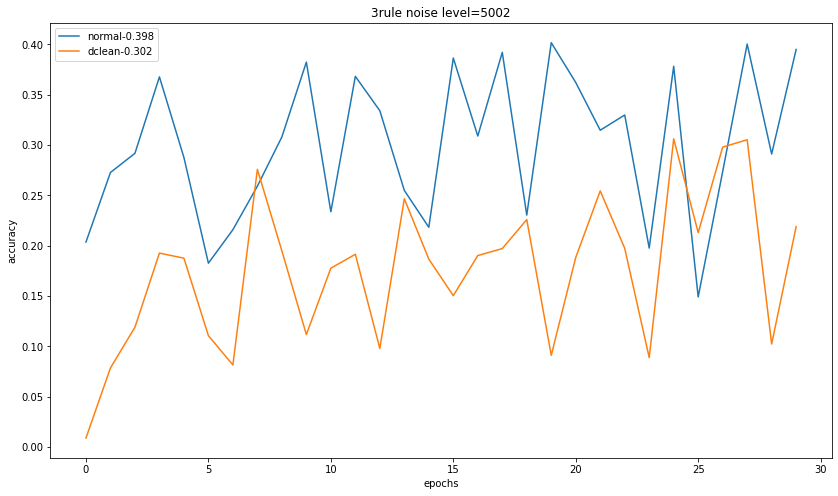

In [15]:
roughModel_path=checkpoint_filepath+'noiseLevel'+noise_level_str+'_testAcc'+acc_well_model
k_top=3
range_epochs=epochs_plot
n_batch_modelt=250
lr_w =0.4
i_run=0

normal_history_name=roughModel_path+'/normal_history_'+str(i_run)
t=np.load(normal_history_name+'.npz',allow_pickle=True)['arr_0']
normal_history=np.array(dict(t.flatten()[0])['val_accuracy'])

dclean_filename=roughModel_path+'/dclean_'+str(i_run)
t=np.load(dclean_filename+'.npz',allow_pickle=True)['arr_0']
dclean_history=np.array(dict(t.flatten()[0])['val_accuracy'])

lc_history_name=roughModel_path+'/LC_forward_history'+str(i_run)
t=np.load(lc_history_name+'.npz',allow_pickle=True)['arr_0']
LC_forward_history=np.array(dict(t.flatten()[0])['val_accuracy'])

lc_history_name=roughModel_path+'/LC_est_forward_history'+str(i_run)
t=np.load(lc_history_name+'.npz',allow_pickle=True)['arr_0']
LC_est_forward_history=np.array(dict(t.flatten()[0])['val_accuracy'])

rule_remove_filename=roughModel_path+'/rule_remove_'+str(i_run)
t=np.load(rule_remove_filename+'.npz',allow_pickle=True)['arr_0']
Rule_remove_history=np.array(dict(t.flatten()[0])['val_accuracy'])
"""
rule_weight_filename=roughModel_path+'/rule_weight_lr_w'+str(lr_w)+'_n_batch_modelt'+str(n_batch_modelt)+'_'+str(i_run)
rule_weight_history=np.load(rule_weight_filename+'history.npz',allow_pickle=True)['arr_1']
rule_weight_history=rule_weight_history[:,1]
"""

t=np.arange(range_epochs)
plt.figure(figsize=(14,8))
plt.plot(
    t,normal_history,
    t,dclean_history,
         #t,rule_weight_history[:range_epochs],
         #t,Rule_remove_history,
         #t,LC_forward_history,
         #t,LC_est_forward_history
         )

normal_history.sort()
dclean_history.sort()
#rule_weight_history.sort()
Rule_remove_history.sort()
LC_forward_history.sort()
LC_est_forward_history.sort()
label=[
       'normal'+'-'+str(np.round(np.mean(normal_history[-k_top:-1]),3)),
       'dclean'+'-'+str(np.round(np.mean(dclean_history[-k_top:-1]),3)),
       #'rule_weight'+'-'+str(np.round(np.mean(rule_weight_history[-k_top:-1]),3)),
       'Rule_remove'+'-'+str(np.round(np.mean(Rule_remove_history[-k_top:-1]),3)),
       'LC_forward'+'-'+str(np.round(np.mean(LC_forward_history[-k_top:-1]),3)),
       'LC_est_forward'+'-'+str(np.round(np.mean(LC_est_forward_history[-k_top:-1]),3)),
       ]
plt.legend(labels=label)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('3rule noise level='+noise_level_str)
plt.savefig(roughModel_path)
n_batch_modelt_list=[250]#[50,150,250]
i_run=0

print(str(np.round(np.mean(normal_history[-k_top:-1]),3)))
print(str(np.round(np.mean(dclean_history[-k_top:-1]),3)))
print(str(np.round(np.mean(LC_forward_history[-k_top:-1]),3)))
print(str(np.round(np.mean(LC_est_forward_history[-k_top:-1]),3)))
print(str(np.round(np.mean(Rule_remove_history[-k_top:-1]),3)))

for lr_w in [0.02,0.1,0.4]:#[0.02,0.1,0.4]
    for n_batch_modelt in [250]:
        rule_weight_filename=roughModel_path+'/rule_weight_lr_w'+str(lr_w)+'_n_batch_modelt'+str(n_batch_modelt)+'_'+str(i_run)
        rule_weight_history=np.load(rule_weight_filename+'history.npz',allow_pickle=True)['arr_1']
        rule_weight_history=rule_weight_history[:,1]
        
        #plt.plot(t,rule_weight_history[:range_epochs])
        rule_weight_history.sort()
        print(str(np.round(np.mean(rule_weight_history[-k_top:-1]),3)))
"""
for lr_w in [0.1]:#[0.02,0.1,0.4]
    for n_batch_modelt in [50,150]:
        rule_weight_filename=roughModel_path+'/rule_weight_lr_w'+str(lr_w)+'_n_batch_modelt'+str(n_batch_modelt)+'_'+str(i_run)
        rule_weight_history=np.load(rule_weight_filename+'history.npz',allow_pickle=True)['arr_1']
        rule_weight_history=rule_weight_history[:,1]
        
        #plt.plot(t,rule_weight_history[:range_epochs])
        rule_weight_history.sort()
        print(str(np.round(np.mean(rule_weight_history[-k_top:-1]),3)))
"""

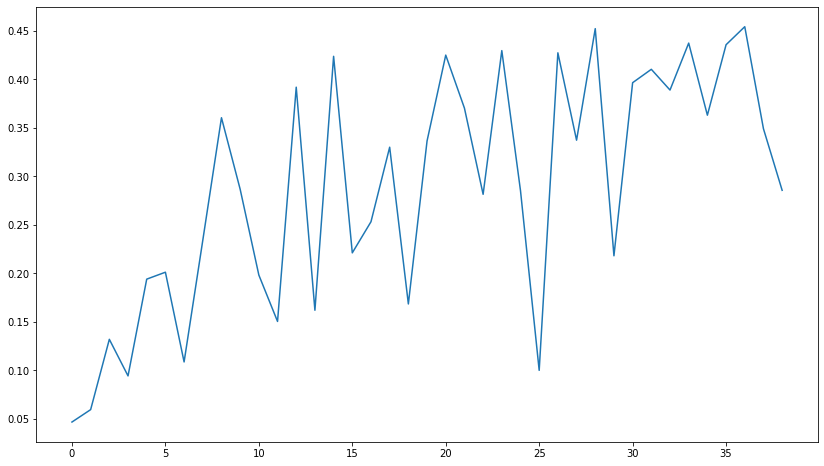

In [ ]:
rule_remove_filename=roughModel_path+'/rule_remove_'+str(i_run)
t=np.load(rule_remove_filename+'.npz',allow_pickle=True)['arr_0']
Rule_remove_history=np.array(dict(t.flatten()[0])['val_accuracy'])
t=np.arange(39)
plt.figure(figsize=(14,8))
plt.plot(Rule_remove_history)

0.482
0.363
0.508
0.497
0.561
0.535
0.557
0.566
0.557
0.553


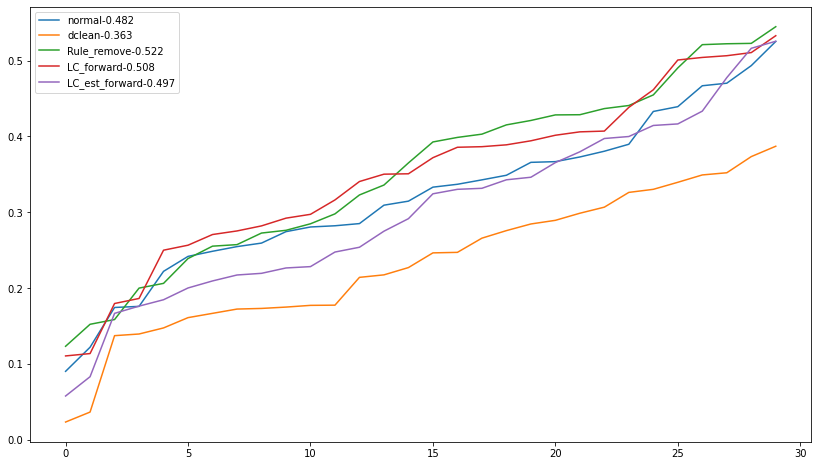

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(
    t,normal_history[:range_epochs],
    t,dclean_history[:range_epochs],
         #t,rule_weight_history[:range_epochs],
         t,Rule_remove_history[:range_epochs],
         t,LC_forward_history[:range_epochs],
         t,LC_est_forward_history[:range_epochs]
         )
label=[
       'normal'+'-'+str(np.round(np.mean(normal_history[-k_top:-1]),3)),
       'dclean'+'-'+str(np.round(np.mean(dclean_history[-k_top:-1]),3)),
       #'rule_weight'+'-'+str(np.round(np.mean(rule_weight_history[-k_top:-1]),3)),
       'Rule_remove'+'-'+str(np.round(np.mean(Rule_remove_history[-k_top:-1]),3)),
       'LC_forward'+'-'+str(np.round(np.mean(LC_forward_history[-k_top:-1]),3)),
       'LC_est_forward'+'-'+str(np.round(np.mean(LC_est_forward_history[-k_top:-1]),3)),
       ]
plt.legend(labels=label)

#.

#.

#remove on terminal (not draf)

#make noisy label

##create noisy label by the prediction of model 

###train a model and create label noise

In [ ]:
tf.random.set_seed(123)
well_model = cifar10resnetQ()
t=well_model.model.fit(full_preprocessed_img, img_author_en,batch_size=batch_size,verbose=1,
              #callbacks=[saveModelEpochAcc()],
              epochs=2)
#scores = well_model.model.evaluate(x_train,y_train_raw,batch_size=2048)
#acc_well_model=str(scores[1])[2:5]
#print(acc_well_model)

Epoch 1/2
928/928 [==============================] - 60s 28ms/step - loss: 4.0873 - accuracy: 0.0962
Epoch 2/2
928/928 [==============================] - 26s 28ms/step - loss: 2.8068 - accuracy: 0.3130


In [ ]:
t=well_model.model.fit(full_preprocessed_img, img_author_en,batch_size=batch_size,verbose=1,
              #callbacks=[saveModelEpochAcc()],
              epochs=1)

928/928 [==============================] - 27s 30ms/step - loss: 2.1930 - accuracy: 0.4467


In [ ]:
scores = well_model.model.evaluate(x_train,y_train_raw,batch_size=512)
trainAcc_well=str(np.round(scores[1],3))[2:5]
print(trainAcc_well)
scores = well_model.model.evaluate(x_test,y_test_raw,batch_size=512)
testAcc_well=str(np.round(scores[1],3))[2:5]
print(testAcc_well)

209/209 [==============================] - 7s 31ms/step - loss: 2.6198 - accuracy: 0.3578
358
24/24 [==============================] - 1s 30ms/step - loss: 2.6408 - accuracy: 0.3571
357


In [ ]:
acc_well_model='358'

In [ ]:
well_model.model.save_weights(checkpoint_filepath+'wellModel/acc_well_train'+acc_well_model+'/weight')


###load available model

In [ ]:
acc_well_model='447'#946 = 676
well_model = cifar10resnetQ()
well_model.model.load_weights(checkpoint_filepath+'wellModel/acc_well_train'+acc_well_model+'/weight')


##change threshold

In [ ]:
full_preprocessed_img=np.load(dataset_path+'preprocessed_byQ/full_preprocessed_img.npz')['arr_0']#shape (118715,24,24)
img_author=np.load(dataset_path+'preprocessed_byQ/img_author.npz')['arr_0']
full_preprocessed_img = full_preprocessed_img.astype("float32") / 255
full_preprocessed_img=np.expand_dims(full_preprocessed_img, -1) #(118715, 24, 24, 1)
#img_author_en=img_author_en[:,0]


In [ ]:
from sklearn.model_selection import train_test_split
random_state_split=3
x_train,x_test, y_train_raw, y_test_raw, idx_train, idx_test= train_test_split(full_preprocessed_img, 
                                                          np.expand_dims(img_author_en, -1), 
                                                          np.arange(118715),test_size=0.1,
                                                          shuffle=True, random_state=random_state_split)
pred_train_1hot = well_model.model.predict(x_train)
pred_train= pred_train_1hot.argmax(axis=1)
n_train_samples=x_train.shape[0]

In [ ]:
#10%: acc_well_model:871 rand_state=3 thread_noise= 0.435 <=> (871 3 435);  (871 2 435);(871 1 335)
#20%: (754 3 445);  (754 2 44);(754 1 40)
#30%: (692 3 334);  (692 2 336);(692 1 255)
#40%: (554 3 412);  (554 2 412);(554 1 3878)
#50%: (358 3 1656);  (358 2 1656);(447 1 41145)
thread_noise=0.1656
idx_noise=[]
y_train_noisy=np.array(y_train_raw) #verified that it clone, not shallow
for i in range(n_train_samples):
    if pred_train[i]!=y_train_raw[i]:
        if pred_train_1hot[i,pred_train[i]]>thread_noise:
            #if is_obey_is_vehicle_sample(pred_train[i],is_vehicle[i]):
                #if is_obey_is_fly_sample(pred_train[i],is_fly[i]):
                    #if is_obey_is_onroad_sample(pred_train[i],is_onroad[i]):
            y_train_noisy[i]=pred_train[i]
            idx_noise.append(i)

print('noise level',len(idx_noise)/n_train_samples)
#verify
noise_level=np.count_nonzero(y_train_noisy!=y_train_raw)/n_train_samples
noise_level=np.round(noise_level,4)
noise_level_str=str(noise_level)[2:5]
print('noise level',noise_level)

noise level 0.5005381728330354
noise level 0.5005


In [ ]:
noise_level_str='500'

In [ ]:
noise_level_str=noise_level_str+str(random_state_split)
if (os.path.exists(checkpoint_filepath+'savez_data/')==False):
    os.mkdir(checkpoint_filepath+'savez_data/')
np.savez(checkpoint_filepath+'savez_data/levelNoise'+noise_level_str+'_acc_well'+acc_well_model, idx_train, idx_test,y_train_noisy)

noise 0%

In [ ]:
random_state_split=3
x_train,x_test, y_train_raw, y_test_raw, idx_train, idx_test= train_test_split(full_preprocessed_img, 
                                                          np.expand_dims(img_author_en, -1), 
                                                          np.arange(118715),test_size=0.1,
                                                          shuffle=True, random_state=random_state_split)
if (os.path.exists(checkpoint_filepath+'savez_data/')==False):
    os.mkdir(checkpoint_filepath+'savez_data/')
np.savez(checkpoint_filepath+'savez_data/levelNoise0'+str(random_state_split)+'_acc_well100', idx_train, idx_test,y_train_raw)

#draf

evaluate n_batch

In [ ]:
#270121 : start change to train on batch instead of fit because it isn't work
if (run_Rule):
    continu=0
    n_batch_modelt_list=[50,150,250]#[50,150,250]
    

    for lr_w in [0.1]:#[0.02,0.1,0.4]
        for n_batch_modelt in n_batch_modelt_list:
            for i_run in i_run_list:
                tf.random.set_seed(i_run)
                epochs=epochs_plot+5
                rule_weight_filename=roughModel_path+'/rule_weight_lr_w'+str(lr_w)+'_n_batch_modelt'+str(n_batch_modelt)+'_'+str(i_run)

                print(str(lr_w)+'_'+str(n_batch_modelt))
                Model_t = cifar10resnetQ()
                
                if (os.path.exists(rule_weight_filename)&(continu==1)):
                    d=np.load(rule_weight_filename+'history.npz',allow_pickle=True)
                    eps,val_history=d['arr_0'],d['arr_1'].tolist()
                    print(len(val_history))
                    Model_t.model.load_weights(rule_weight_filename+'/rule_weight_tmp')
                    epochs=epochs-len(val_history)
                else: #include case: avaiable model & force_run_again=1 & continu=0
                    eps=np.ones(n_train_samples)
                    val_history=[]
                
                mb_rule=batch_size_modelt*n_batch_modelt
                steps_per_epoch=n_train_samples//mb_rule
                period_val=steps_per_epoch
                T=int(epochs*steps_per_epoch+1)
                for t in range(0,T):
                    idx_mb=np.random.choice(n_train_samples,mb_rule,replace=False)
                    Xt=x_train[idx_mb]
                    Yt=whole_Yt[idx_mb]
                    Dt=np.nonzero(whole_Dt[idx_mb])[0]#a mask(t=1 inplace of violated sample)
                    Label_t=whole_Label_t[idx_mb]
                    if Dt.shape[0]!=0:
                        
                        pred=K.variable(Model_t.model.predict(Xt[Dt]))
                        K_cate_loss=tf.constant(K.sparse_categorical_crossentropy(K.variable(Label_t[Dt]), pred),dtype=float)
                        #e=tf.convert_to_tensor(eps[Dt],dtype=float)
                        e=tf.Variable(eps[idx_mb[Dt]],dtype=float)
                        with tf.GradientTape(persistent=False) as tape:
                            #Loss=tf.keras.losses.CategoricalCrossentropy()
                            #loss=Loss(Label_t,Model_t_pred,sample_weight=eps)
                            loss=tf.math.reduce_sum(tf.math.multiply(e,K_cate_loss))
                        gt=tape.gradient(loss,e).numpy()
                        #print(tf.math.reduce_max(gt))
                        tmp=eps[idx_mb[Dt]]-lr_w*gt
                        eps[idx_mb[Dt]]=(tmp>0)*tmp
                        del e,loss,gt,Yt,K_cate_loss,tape
                        K.clear_session()
                    datagen.fit(Xt)
                    Model_t.model.fit(
                        #Xt, Label_t, batch_size=batch_size_modelt,sample_weight=eps[idx_mb],
                        x=datagen.flow(Xt, Label_t, batch_size=batch_size_modelt,sample_weight=eps[idx_mb]),
                        #steps_per_epoch=n_train_samples // batch_size,
                        epochs=1,verbose=0)
                    if(t %period_val==0):
                        val_history.append(Model_t.model.evaluate(x_test,y_test_raw,verbose=1))
                        #if (t==stop_t):
                        #    break
                if is_save:
                    np.savez(rule_weight_filename+'history',eps,np.array(val_history))
                    if (os.path.exists(rule_weight_filename)==False):
                        os.mkdir(rule_weight_filename)
                    Model_t.model.save_weights(rule_weight_filename+'/rule_weight_tmp')
                    #print(K.get_value(Model_t.model.optimizer.lr))
"""




    Model_t.model.fit(Xt, Label_t.astype(float),sample_weight=eps[idx_mb],
                              validation_data=(x_test,y_test_1hot),batch_size=batch_size_modelt,
                              epochs=1,verbose=2,validation_freq=1,use_multiprocessing=True)
    print(K.get_value(Model_t.model.optimizer.lr))
    Model_t.model.save_weights(roughModel_path+'/Model_t_tmp')
    if(t %period_val==0):
        print(history)
        pred_test = Model_t.model.predict(x_test).argmax(axis=1)
        acc_test=np.count_nonzero(pred_test==y_test_raw)/10000
        print(acc_test)
        """

0.1_50
371/371 [==============================] - 1s 3ms/step - loss: 5.7774 - accuracy: 0.3817
0.1_150
371/371 [==============================] - 1s 3ms/step - loss: 3.0743 - accuracy: 0.5371
0.1_250
371/371 [==============================] - 1s 3ms/step - loss: 2.7159 - accuracy: 0.5585


"\n\n\n\n\n    Model_t.model.fit(Xt, Label_t.astype(float),sample_weight=eps[idx_mb],\n                              validation_data=(x_test,y_test_1hot),batch_size=batch_size_modelt,\n                              epochs=1,verbose=2,validation_freq=1,use_multiprocessing=True)\n    print(K.get_value(Model_t.model.optimizer.lr))\n    Model_t.model.save_weights(roughModel_path+'/Model_t_tmp')\n    if(t %period_val==0):\n        print(history)\n        pred_test = Model_t.model.predict(x_test).argmax(axis=1)\n        acc_test=np.count_nonzero(pred_test==y_test_raw)/10000\n        print(acc_test)\n        "

In [ ]:
plt.hist(y_test_raw)

In [ ]:
plt.hist(y_train_raw)

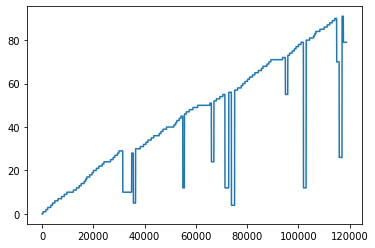

In [ ]:
plt.plot(img_author_en)

5996.0

In [ ]:
np.std(t[0])

926.9809556975256

Text(0.5, 1.0, 'distribution of number of samples each class')

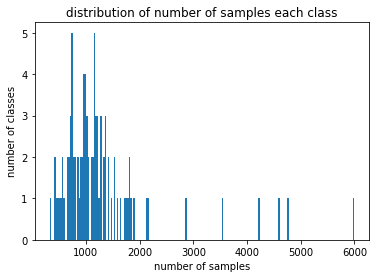

In [ ]:
plt.hist(t[0],bins=200)
plt.xlabel('number of samples')
plt.xticks()
plt.ylabel('number of classes')
plt.title('distribution of number of samples each class')

Text(0.5, 1.0, 'distribution of number of samples each class')

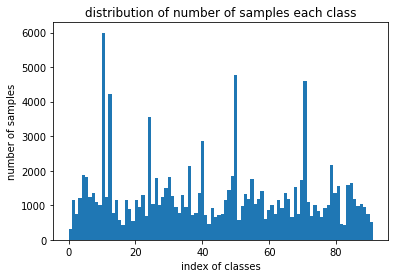

In [ ]:
t=plt.hist(img_author_en,bins=92)
plt.xlabel('index of classes')
plt.xticks()
plt.ylabel('number of samples')
plt.title('distribution of number of samples each class')

In [ ]:
tt=[]
cnt=0
for i in t[0]:
    if i<2000:
        tt.append(i)
        cnt+=1
print(92-cnt)
print(np.mean(tt))
print(np.std(tt))

8
1052.9404761904761
372.0767762294457


##explore violated samples

In [ ]:
cm = confusion_matrix(y_train_raw, y_train_noisy)
plot_confusion_matrix(cm, list_class,plot_number=False,
                      title='before removing violated-rules samples (3 rules,N='+str(N),
                      ylabel='y_train_raw',
                      xlabel='y_train_noisy')

In [ ]:
Dt=np.nonzero(whole_Dt)[0]#a mask(t=1 inplace of violated sample)
eps=np.ones(whole_Dt.shape[0],dtype=int)
eps[Dt]=0
idx_obey_samples=np.nonzero(eps)[0]
x_train_obey_samples=x_train[idx_obey_samples]
y_train_noisy_obey_samples=y_train_noisy[idx_obey_samples]

cm = confusion_matrix(y_train_raw[idx_obey_samples], y_train_noisy_obey_samples)
plot_confusion_matrix(cm, list_class,plot_number=False,
                      title='removed violated-rules samples (3 rules,N='+str(N),
                      ylabel='y_train_raw',
                      xlabel='y_train_noisy_obey_samples')

In [ ]:
y_noisy_violated_samples=y_train_noisy[Dt]
cm = confusion_matrix(y_train_raw[Dt], y_noisy_violated_samples)
plot_confusion_matrix(cm, list_class,plot_number=False,
                      title='removed violated-rules samples (3 rules,N='+str(N),
                      ylabel='y_train_raw',
                      xlabel='y_noisy_violated_samples')

#author_sameAttribute

In [ ]:
author_sameAttribute=np.zeros(92)

for i in range(92):
    for j in range(i,92):
        if (db_author_company[author_decode[i]]==db_author_company[author_decode[j]]):
            if (db_author_Genre[author_decode[i]]==db_author_Genre[author_decode[j]]):
                if (db_author_for[author_decode[i]]==db_author_for[author_decode[j]]):
                    author_sameAttribute[i]+=1

In [ ]:
plt.plot(author_sameAttribute)